In [1]:
pip install pandas-datareader


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data
tesla_df = yf.download("TSLA", start="2020-01-01", end="2024-12-31")

print(tesla_df.head())

C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_24404\3156884078.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_df = yf.download("TSLA", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500


In [5]:
tesla_df

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800


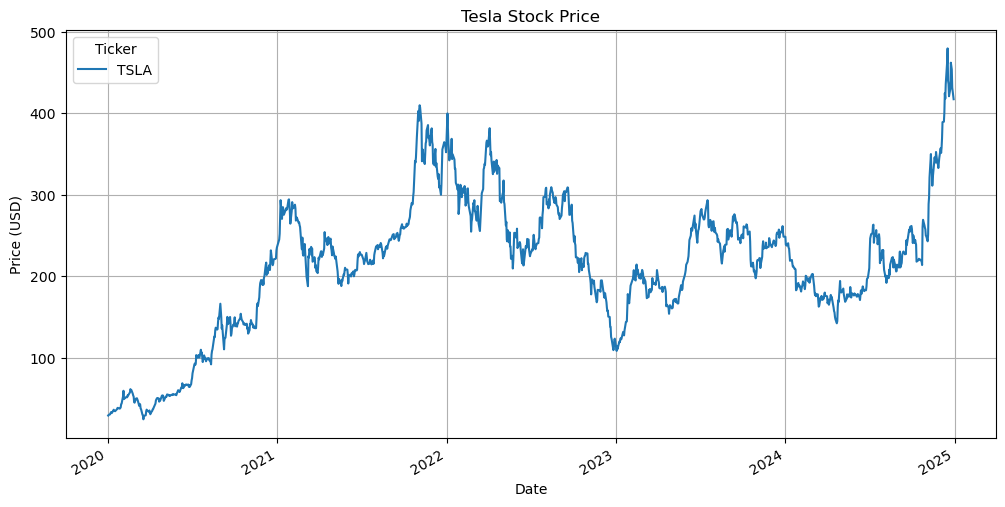

In [6]:
tesla_df["Close"].plot(figsize=(12,6), title="Tesla Stock Price")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

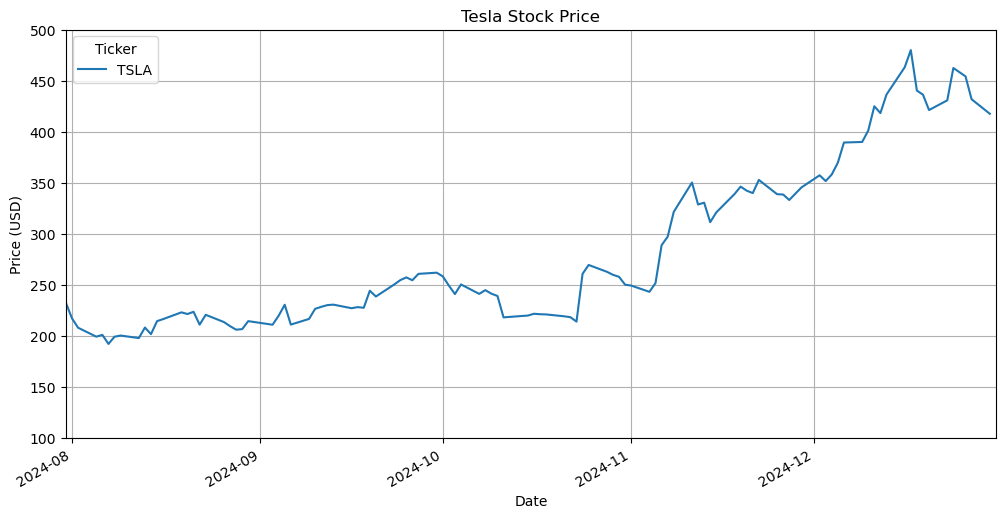

In [7]:
tesla_df["Close"].plot(xlim = ["2024-07-31", "2024-12-31"] , figsize=(12,6), ylim = [100, 500], title="Tesla Stock Price")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

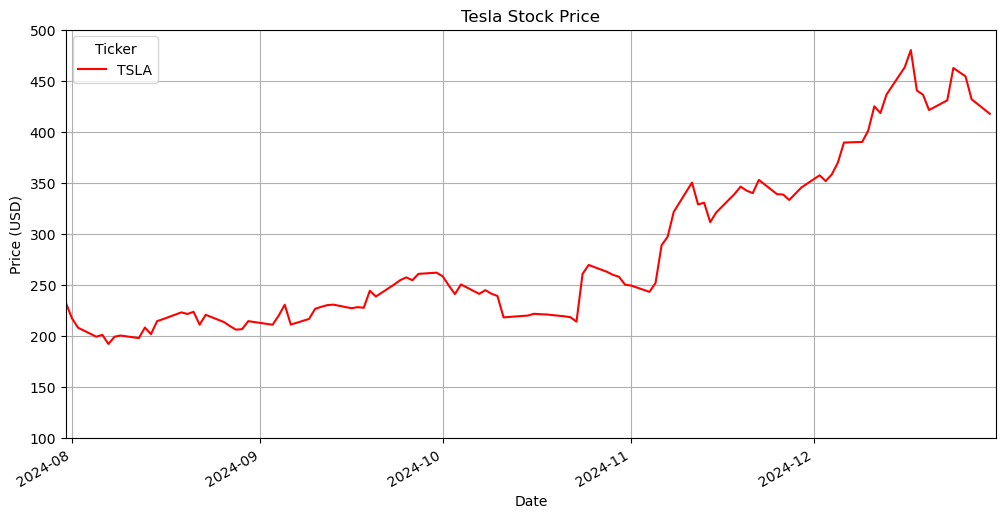

In [8]:
tesla_df["Close"].plot(c = "red",xlim = ["2024-07-31", "2024-12-31"] ,
                       figsize=(12,6), ylim = [100, 500], title="Tesla Stock Price")
plt.grid()
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [9]:
tesla_df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [10]:
share_open = tesla_df.loc['2020-01-02': '2021-09-01' ]["Open"]
index = tesla_df.loc['2020-01-02': '2021-09-01' ].index

In [11]:
share_open

Ticker,TSLA
Date,
2020-01-02,28.299999
2020-01-03,29.366667
2020-01-06,29.364668
2020-01-07,30.760000
2020-01-08,31.580000
...,...
2021-08-26,236.103333
2021-08-27,235.000000
2021-08-30,238.240005


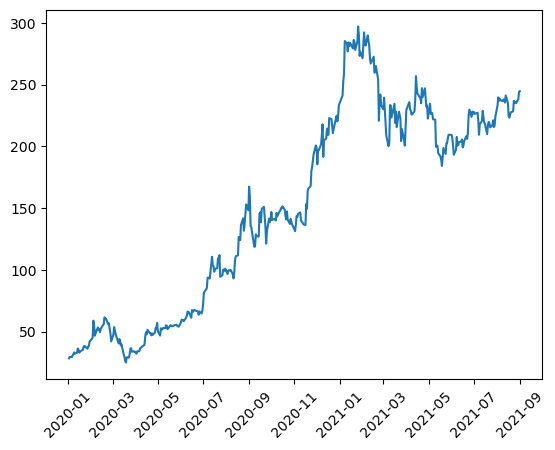

In [12]:
figure, ax = plt.subplots()
ax.plot(index, share_open)
plt.xticks(rotation=45)
plt.show()

In [13]:
tesla_df = tesla_df.reset_index()

In [14]:
pd.to_datetime(tesla_df["Date"])

0      2020-01-02
1      2020-01-03
2      2020-01-06
3      2020-01-07
4      2020-01-08
          ...    
1252   2024-12-23
1253   2024-12-24
1254   2024-12-26
1255   2024-12-27
1256   2024-12-30
Name: Date, Length: 1257, dtype: datetime64[ns]

In [15]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        1257 non-null   datetime64[ns]
 1   (Close, TSLA)   1257 non-null   float64       
 2   (High, TSLA)    1257 non-null   float64       
 3   (Low, TSLA)     1257 non-null   float64       
 4   (Open, TSLA)    1257 non-null   float64       
 5   (Volume, TSLA)  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [16]:
tesla_df = tesla_df.set_index("Date", drop = True)

In [17]:
tesla_df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [18]:
datetime.now()

datetime.datetime(2025, 8, 4, 16, 4, 8, 776742)

<Axes: xlabel='Date'>

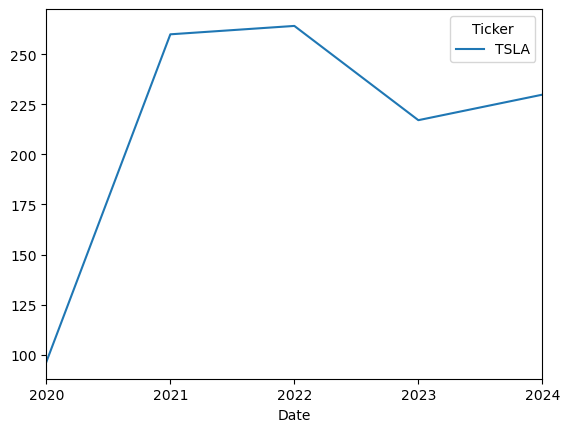

In [19]:
tesla_df.resample(rule = "YE").mean()["Open"].plot()

In [20]:
tesla_df.resample(rule = "Q").mean()["Open"].head()

C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_24404\782837688.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  tesla_df.resample(rule = "Q").mean()["Open"].head()


Ticker,TSLA
Date,
2020-03-31,41.387785
2020-06-30,54.002805
2020-09-30,117.658510
2020-12-31,170.048645
2021-03-31,251.689999


C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_24404\703420178.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  tesla_df.resample(rule = "Q").mean()["Open"].plot()


<Axes: xlabel='Date'>

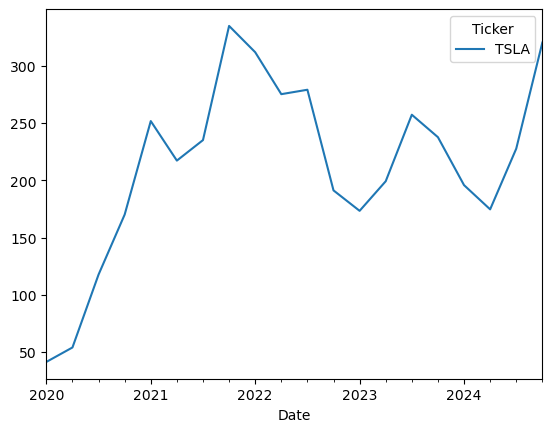

In [21]:
tesla_df.resample(rule = "Q").mean()["Open"].plot()

In [22]:
tesla_df.resample(rule = "BA").mean()["Open"].head()

C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_24404\3847045555.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  tesla_df.resample(rule = "BA").mean()["Open"].head()


Ticker,TSLA
Date,
2020-12-31,96.369476
2021-12-31,259.946429
2022-12-30,264.135232
2023-12-29,217.075040
2024-12-31,229.810957


C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_24404\3483633006.py:1: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  tesla_df.resample(rule = "BA").mean()["Open"].plot()


<Axes: xlabel='Date'>

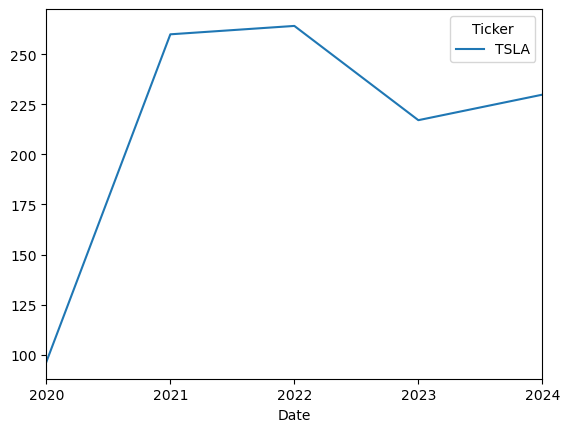

In [23]:
tesla_df.resample(rule = "BA").mean()["Open"].plot()

In [24]:
tesla_df["High"].rolling(11).mean().head(20)

Ticker,TSLA
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
2020-01-09,NaN
2020-01-10,NaN
2020-01-13,NaN
2020-01-14,NaN


In [25]:
tesla_df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-01-02,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,32.809334,33.232666,31.215334,31.580000,467164500


In [26]:
#Simple moving average
#It will show averange mean of past five days on sixth day
tesla_df["10_days_rolling"] = tesla_df["High"].rolling(window=10, min_periods=1).mean()
tesla_df["30_days_rolling"] = tesla_df["High"].rolling(window=30, min_periods=1).mean()
tesla_df["50_days_rolling"] = tesla_df["High"].rolling(window=50, min_periods=1).mean()

tesla_df[["High", "10_days_rolling"]]

Price,High,10_days_rolling
Ticker,TSLA,
Date,,
2020-01-02,28.713333,28.713333
2020-01-03,30.266666,29.490000
2020-01-06,30.104000,29.694667
2020-01-07,31.441999,30.131500
2020-01-08,33.232666,30.751733
...,...,...
2024-12-23,434.510010,447.387997
2024-12-24,462.779999,452.692996


<Axes: xlabel='Date'>

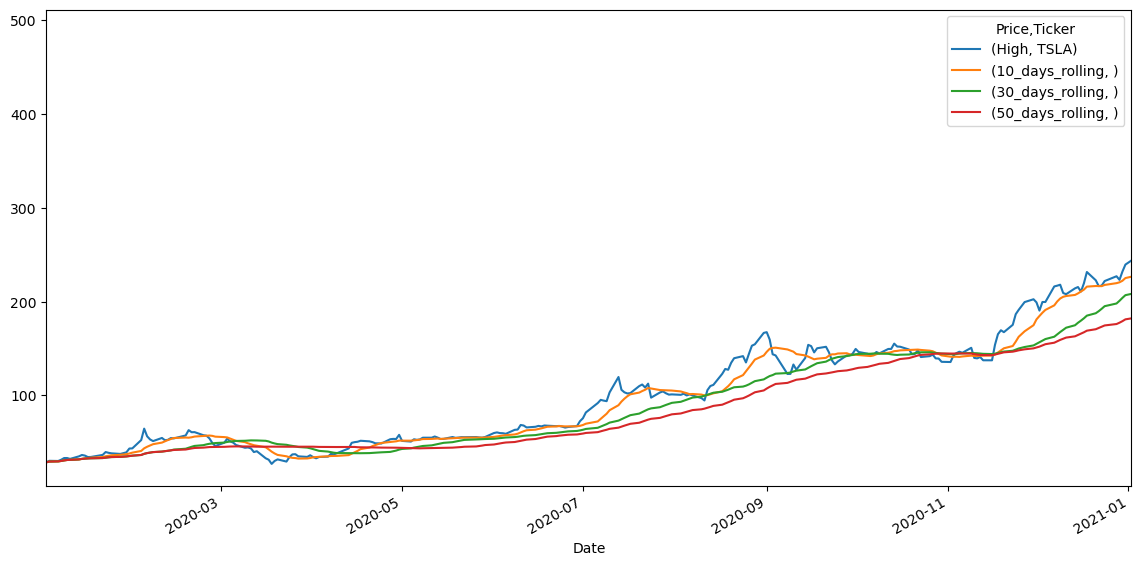

In [27]:
tesla_df[["High", "10_days_rolling", "30_days_rolling", "50_days_rolling"]].plot(kind = "line", figsize = (14, 7), xlim = ["2020-01-02", "2021-01-02"])

<Axes: xlabel='Date'>

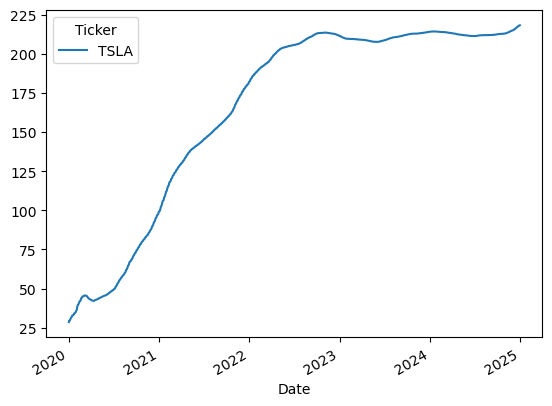

In [28]:
#cummulative moving average
tesla_df["High"].expanding().mean().plot()

In [29]:
#exponential moving average
tesla_df["EMA"] = tesla_df["High"].ewm(alpha = 0.1, adjust  = False).mean()
tesla_df["EMA"] 

Date
2020-01-02     28.713333
2020-01-03     28.868666
2020-01-06     28.992200
2020-01-07     29.237180
2020-01-08     29.636728
                 ...    
2024-12-23    415.714920
2024-12-24    420.421428
2024-12-26    424.912284
2024-12-27    427.421055
2024-12-30    427.378950
Name: EMA, Length: 1257, dtype: float64

<Axes: xlabel='Date'>

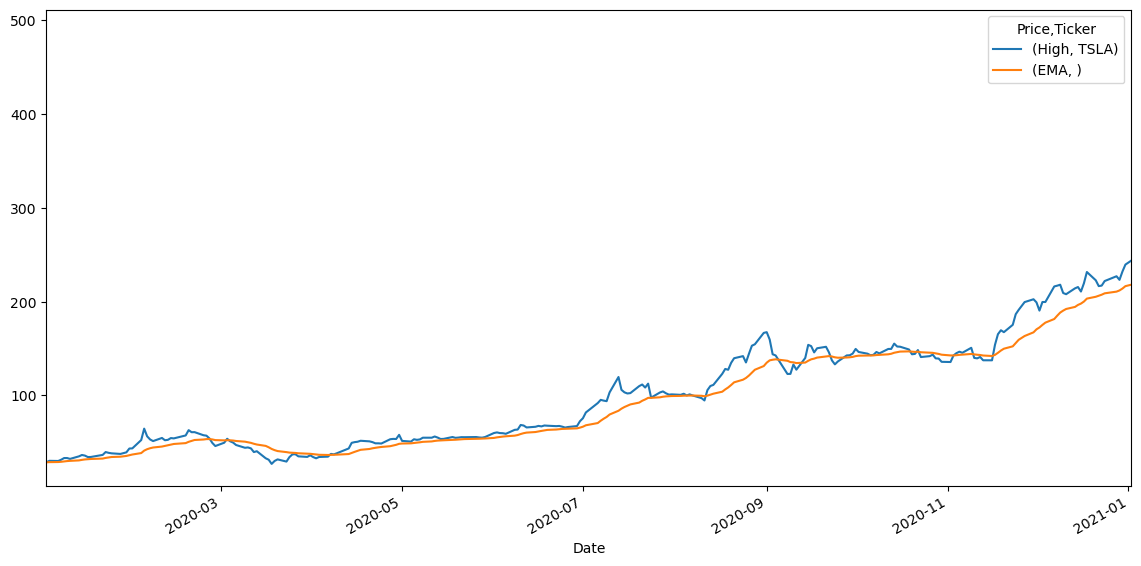

In [30]:
tesla_df[["High", "EMA"]].plot(kind = "line", figsize = (14, 7), xlim = ["2020-01-02", "2021-01-02"])